In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import residuals_plot
import lightgbm as lgb
import xgboost as xgb

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("employment_rates_by_graduate_type_2007222.csv")
data.head()
data.shape

(96, 15)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time_period             96 non-null     int64  
 1   time_identifier         96 non-null     object 
 2   geographic_level        96 non-null     object 
 3   country_code            96 non-null     object 
 4   country_name            96 non-null     object 
 5   age_group               96 non-null     object 
 6   graduate_type           96 non-null     object 
 7   Employment_rate         96 non-null     float64
 8   High_skill_emp_rate     96 non-null     float64
 9   Unemployment_rate       96 non-null     float64
 10  inactivity_rate         96 non-null     float64
 11  employ_accuracy_flag    0 non-null      float64
 12  hse_accuracy_flag       0 non-null      float64
 13  unemploy_accuracy_flag  17 non-null     object 
 14  Inactive_accuracy_flag  1 non-null      obje

In [4]:
# To drop irrelevant columns

cols_to_remove = ['time_identifier', 'geographic_level',
          'country_code', 'country_name', 'employ_accuracy_flag',
           'hse_accuracy_flag', 'unemploy_accuracy_flag', 'Inactive_accuracy_flag']
data = data.drop(columns = cols_to_remove)

In [5]:
# To create a copy of the dataframe
data_copy = data.copy()

# Label Encoding
label_encoder = LabelEncoder() # Create instance of label encoder
categorical_columns = ['age_group', 'graduate_type'] 

# To apply encoding to categorical columns
for column in categorical_columns:
    data_copy[column] = label_encoder.fit_transform(data[column])
data_copy


,time_period,age_group,graduate_type,Employment_rate,High_skill_emp_rate,Unemployment_rate,inactivity_rate
0,2007,0,0,87.3,68.7,2.8,10.2
1,2007,0,1,72.2,23.4,6.2,23.1
2,2007,0,2,89.0,81.2,2.6,8.6
3,2007,1,0,86.9,60.2,4.1,9.4
4,2007,1,1,72.6,20.0,7.8,21.2
...,...,...,...,...,...,...,...
91,2022,0,1,69.6,23.6,4.8,26.9
92,2022,0,2,89.3,78.3,2.0,8.8
93,2022,1,0,88.1,60.8,4.3,8.0
94,2022,1,1,74.4,21.9,5.7,21.1


Random Forest Regressor Model:
Mean Absolute Error: 0.6153
Mean Squared Error: 0.7983
Root Mean Squared Error: 0.8935
R-squared (R2) Score: 0.9868

LightGBM Regressor Model:
Mean Absolute Error: 0.9641
Mean Squared Error: 1.9524
Root Mean Squared Error: 1.3973
R-squared (R2) Score: 0.9677

XGBoost Regressor Model:
Mean Absolute Error: 0.4942
Mean Squared Error: 0.4710
Root Mean Squared Error: 0.6863
R-squared (R2) Score: 0.9922



C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

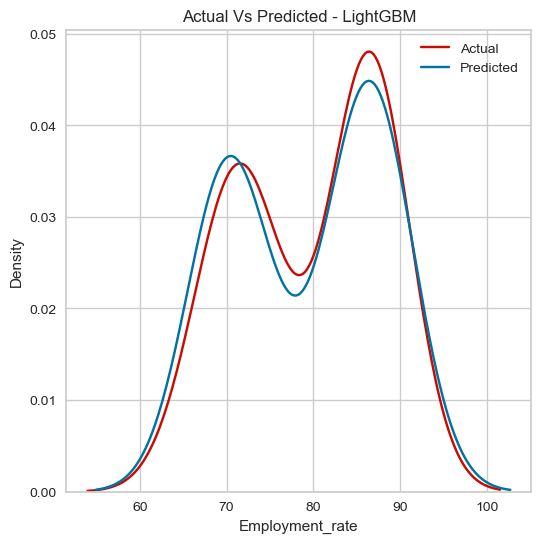

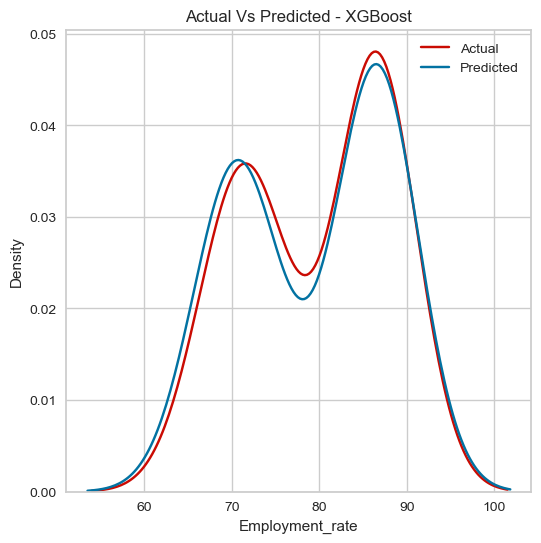

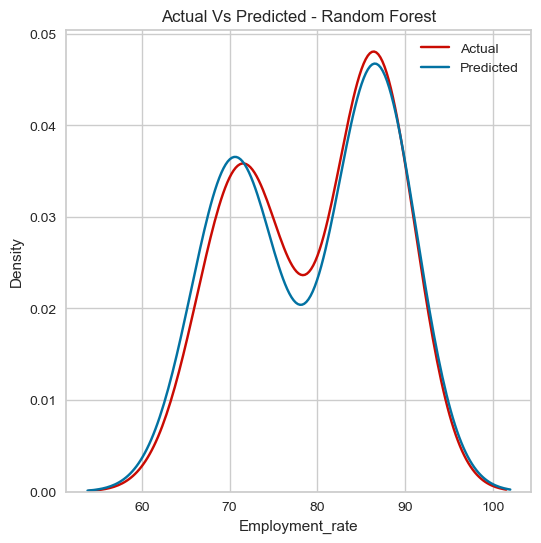

In [7]:

# To select all features except target feature
X = data_copy.drop(['Employment_rate'], axis=1)
# To select target
y = data_copy['Employment_rate']

# To split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To create an instance of Random Forest Regressor Model 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# To fit the training data on the model and predict the output on test data
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# To create an instance of LightGBM Regressor Model
lgbm_model = lgb.LGBMRegressor(random_state=42)
#To fit the training data on the model and predict the output on test data
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# To create an instance of XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
# To fit the training data on the model and predict the output on test data
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# To evaluate the models 
def evaluate_model(name, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    print(f"{name} Model:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    print("")
    
# To call the evaluate_model function    
evaluate_model("Random Forest Regressor", rf_pred)
evaluate_model("LightGBM Regressor", lgbm_pred)
evaluate_model("XGBoost Regressor", xgb_pred)

# To plot Actual vs Predicted Graph for each model
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(lgbm_pred, hist=False, color="b", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - LightGBM")
plt.legend()

plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(xgb_pred, hist=False, color="b", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - XGBoost")
plt.legend()

plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(rf_pred, hist=False, color="b", label="Predicted", ax=ax1)
plt.title("Actual Vs Predicted - Random Forest")
plt.legend()
